In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("Sales Data.csv")

# First 5 rows
print(df.head())

# Basic stats
print(df.describe())

# Check missing values
print(df.isnull().sum())
#data cleaning
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['City'] = df['City'].str.strip()



   Unnamed: 0  Order ID               Product  Quantity Ordered  Price Each  \
0           0    295665    Macbook Pro Laptop                 1     1700.00   
1           1    295666    LG Washing Machine                 1      600.00   
2           2    295667  USB-C Charging Cable                 1       11.95   
3           3    295668      27in FHD Monitor                 1      149.99   
4           4    295669  USB-C Charging Cable                 1       11.95   

            Order Date                        Purchase Address  Month  \
0  2019-12-30 00:01:00  136 Church St, New York City, NY 10001     12   
1  2019-12-29 07:03:00     562 2nd St, New York City, NY 10001     12   
2  2019-12-12 18:21:00    277 Main St, New York City, NY 10001     12   
3  2019-12-22 15:13:00     410 6th St, San Francisco, CA 94016     12   
4  2019-12-18 12:38:00           43 Hill St, Atlanta, GA 30301     12   

     Sales            City  Hour  
0  1700.00   New York City     0  
1   600.00   New

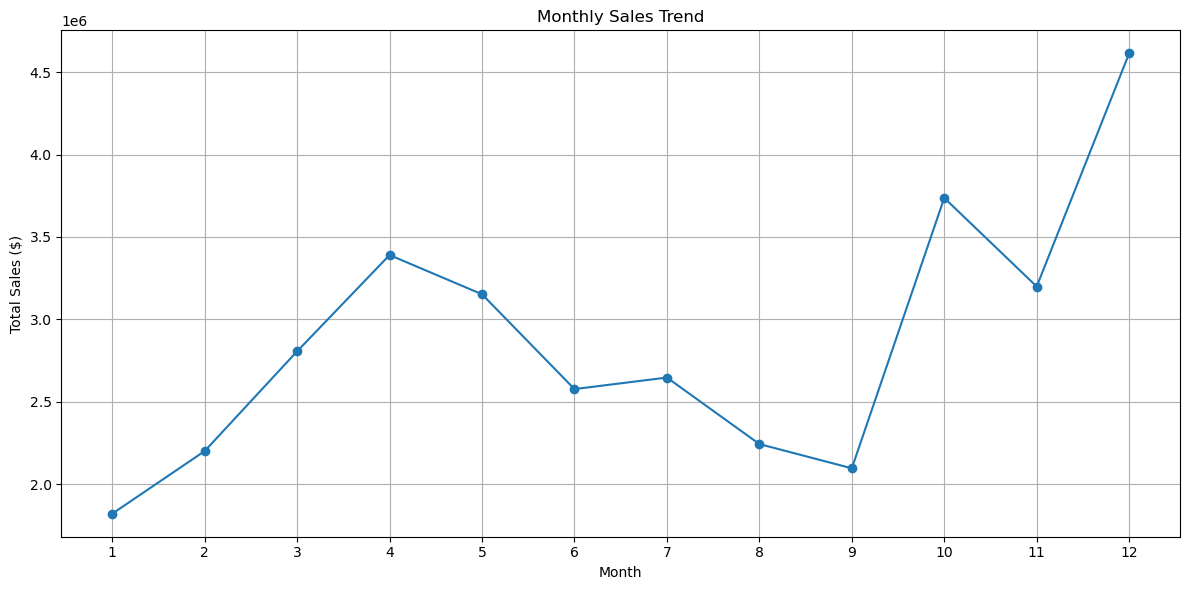

In [2]:
# 1. Monthly Sales Trend
plt.figure(figsize=(12, 6))
monthly_sales = df.groupby('Month')['Sales'].sum()
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

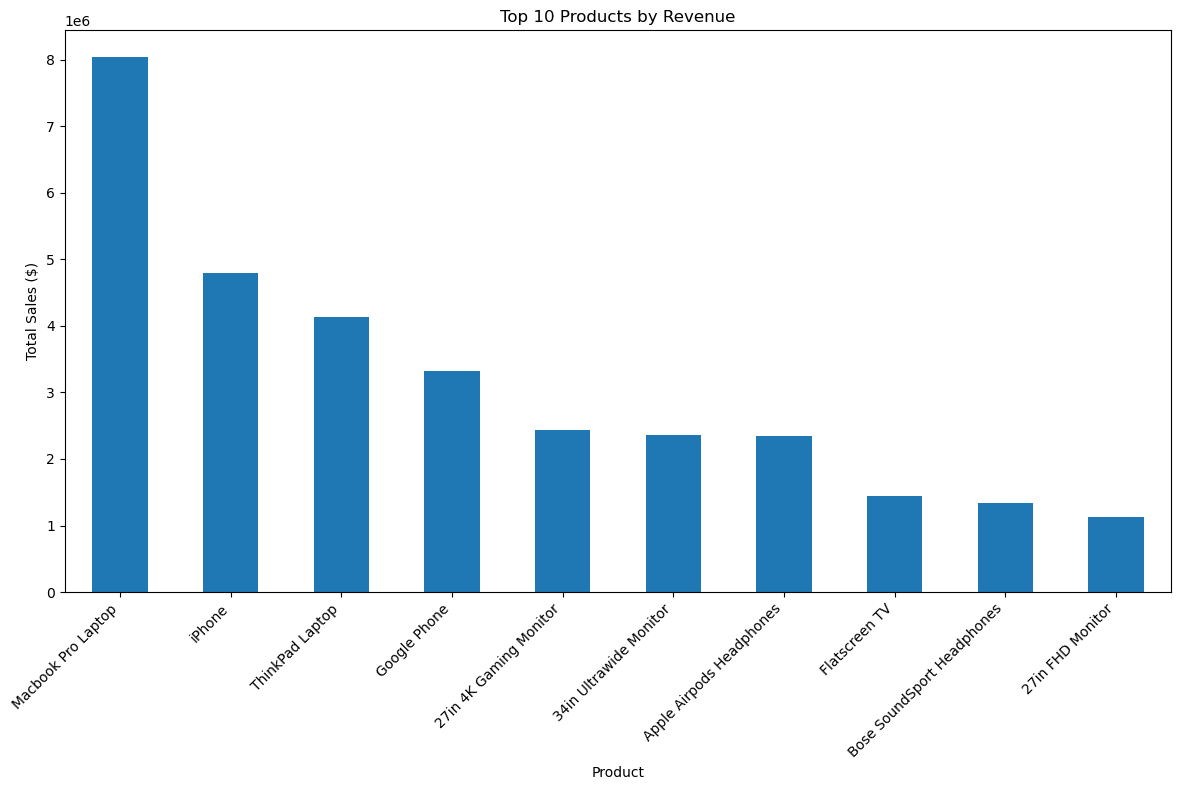

In [3]:
# 2. Top Selling Products by Revenue
plt.figure(figsize=(12, 8))
product_sales = df.groupby('Product')['Sales'].sum().sort_values(ascending=False).head(10)
product_sales.plot(kind='bar')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

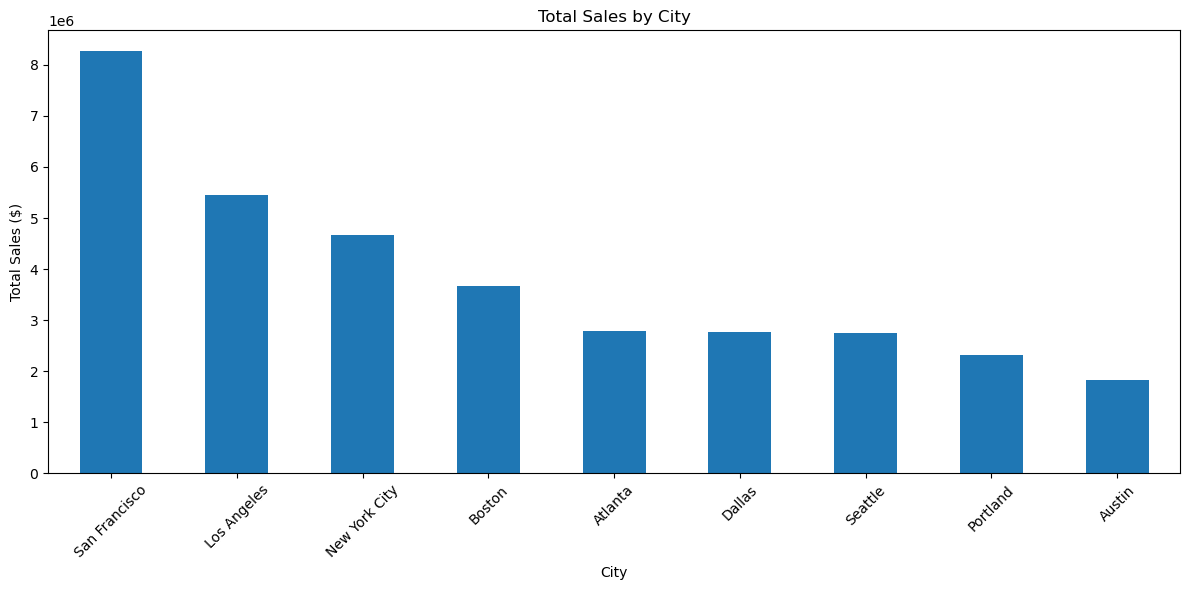

In [4]:
# 3. Sales by City
plt.figure(figsize=(12, 6))
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)
city_sales.plot(kind='bar')
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


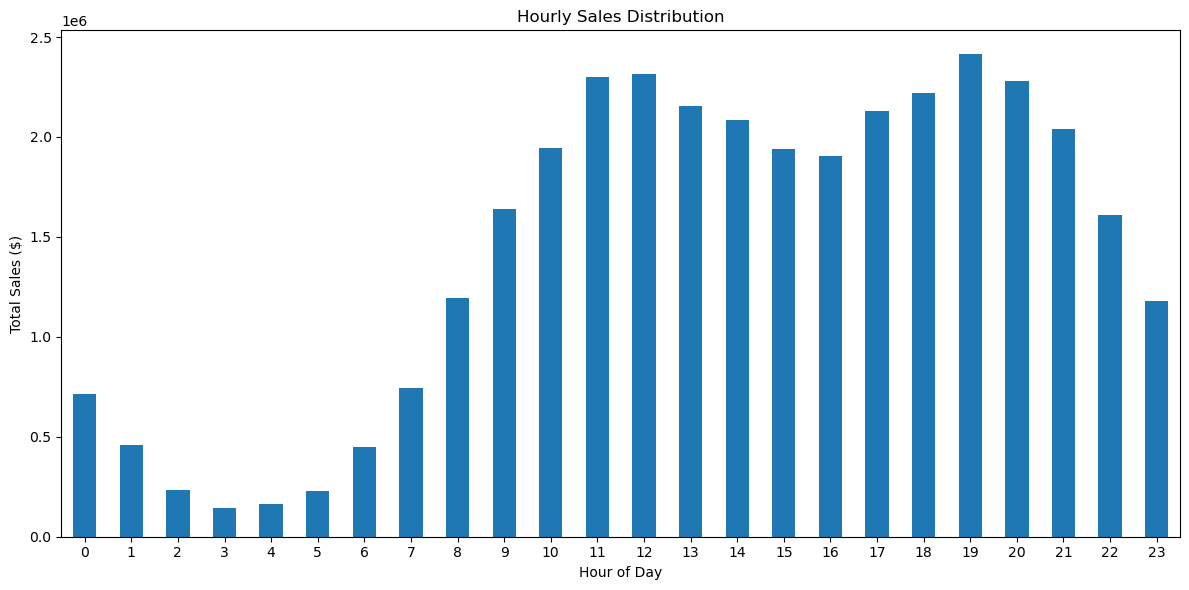

In [5]:
# 4. Hourly Sales Pattern
plt.figure(figsize=(12, 6))
hourly_sales = df.groupby('Hour')['Sales'].sum()
hourly_sales.plot(kind='bar')
plt.title('Hourly Sales Distribution')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

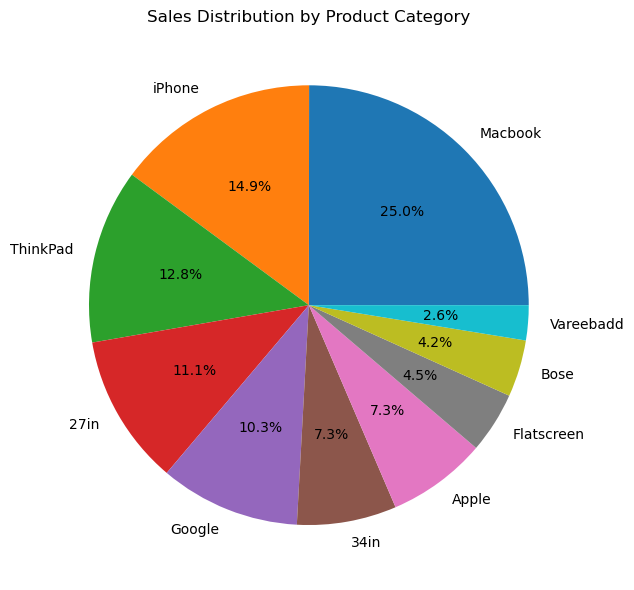

In [7]:
# 5. Product Category Analysis
# First extract product categories
df['Product Category'] = df['Product'].apply(lambda x: x.split()[0] if ' ' in x else x)

plt.figure(figsize=(12, 6))
category_sales = df.groupby('Product Category')['Sales'].sum().sort_values(ascending=False).head(10)
category_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales Distribution by Product Category')
plt.ylabel('')
plt.tight_layout()
plt.show()

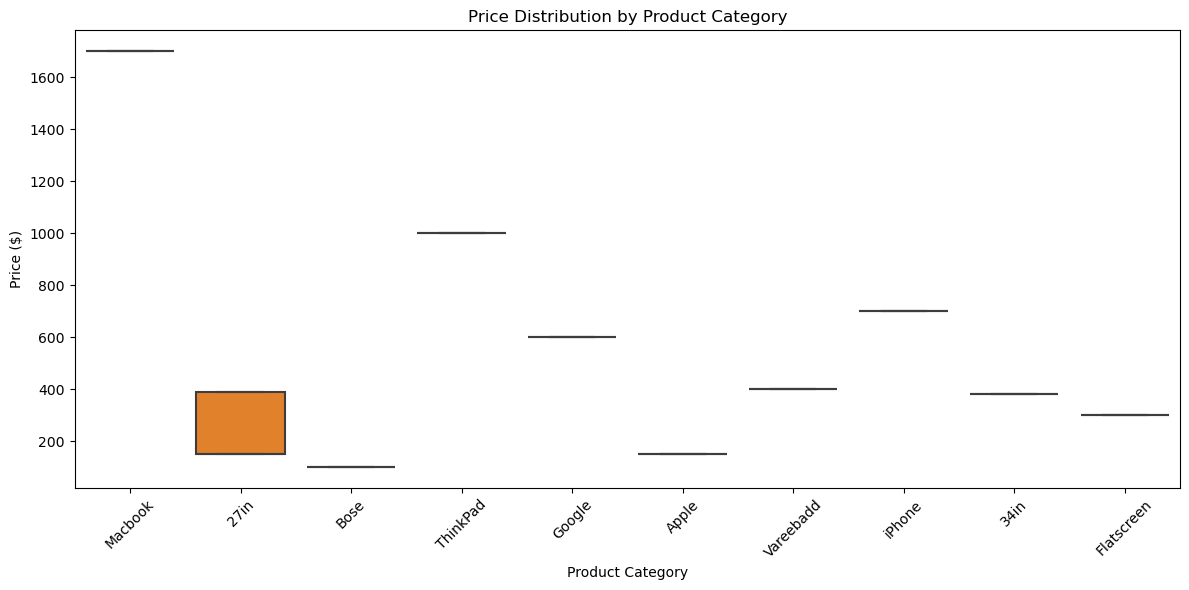

In [8]:
# 6. Price Distribution of Products
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product Category', y='Price Each', data=df[df['Product Category'].isin(category_sales.index)])
plt.title('Price Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

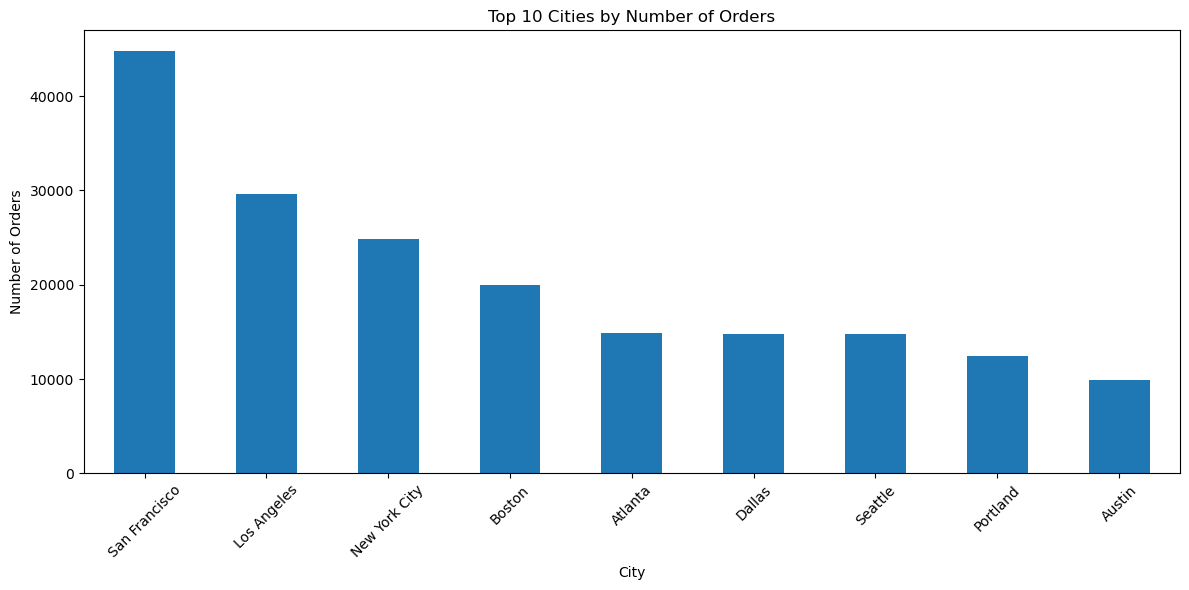

In [9]:
# 7. Top Cities by Number of Orders
plt.figure(figsize=(12, 6))
city_orders = df['City'].value_counts().head(10)
city_orders.plot(kind='bar')
plt.title('Top 10 Cities by Number of Orders')
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


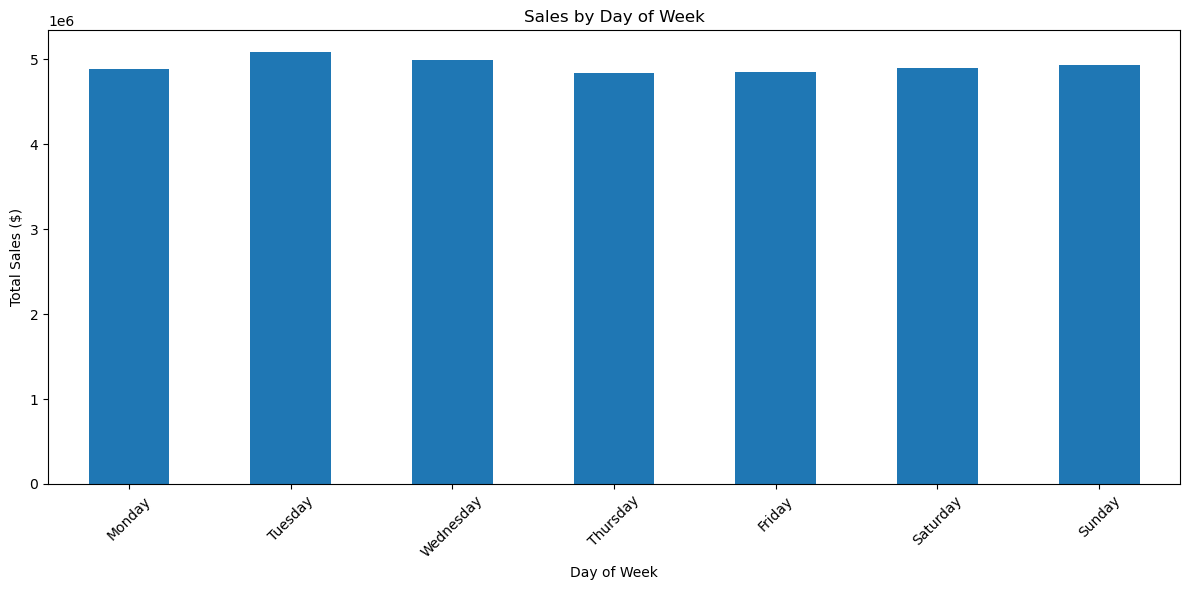

In [10]:
# 8. Sales by Day of Week
df['Day of Week'] = df['Order Date'].dt.day_name()

plt.figure(figsize=(12, 6))
day_sales = df.groupby('Day of Week')['Sales'].sum()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_sales = day_sales.reindex(day_order)
day_sales.plot(kind='bar')
plt.title('Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()